# 이진 분류

***

기존 선형 회귀 모델의 마지막 단에 시그모이드 함수가 추가 -> 이진 로지스틱 회귀 모델

In [762]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [763]:
import matplotlib.pyplot as plt
%matplotlib inline

In [764]:
import torch
import torch.nn as nn

In [765]:
import numpy as np

In [766]:
x = np.arange(-5, 5.1, 0.25)

In [767]:
x = torch.tensor(x, dtype = torch.float)

In [768]:
y = torch.sigmoid(x)

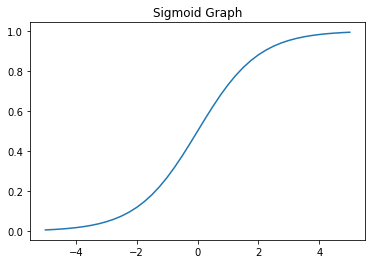

In [769]:
plt.title("Sigmoid Graph")
plt.plot(x.data, y.data)
plt.show()

In [770]:
from sklearn.datasets import load_breast_cancer

In [771]:
CFG = {"num_epochs" : 2000, "lr" : 0.04}

In [772]:
data = load_breast_cancer()

In [773]:
X, y = data.data, data.target

In [774]:
X.shape, y.shape

((569, 30), (569,))

In [775]:
from sklearn.model_selection import train_test_split

In [776]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 100, random_state = 42, stratify = y)

In [777]:
X_train.shape, X_test.shape

((469, 30), (100, 30))

In [778]:
class Net(nn.Module) :
    
    def __init__(self) :
        super().__init__()
        self.layer = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x) :
        x = self.layer(x)
        x = self.sigmoid(x)
        
        return x

In [779]:
net = Net()

In [780]:
net

Net(
  (layer): Linear(in_features=30, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [781]:
criterion = nn.BCELoss()

In [782]:
from torch.optim import Adam, RMSprop

In [783]:
adam = Adam(net.parameters(), lr = CFG['lr']) 

In [784]:
from tqdm import tqdm_notebook

In [785]:
X_train = torch.tensor(X_train, dtype = torch.float)
X_test = torch.tensor(X_test, dtype = torch.float)
y_train = torch.tensor(y_train, dtype = torch.float)
y_test = torch.tensor(y_test, dtype = torch.float)

In [786]:
from sklearn.metrics import accuracy_score

In [787]:
import warnings
warnings.filterwarnings('ignore')

In [788]:
tr_losses = []
te_losses = []
tr_accs = []
te_accs = []

for epoch in tqdm_notebook(range(CFG['num_epochs'])) :
    
    adam.zero_grad()
    tr_pred = net(X_train)
    tr_cls = [1 if p >= 0.5 else 0 for p in tr_pred]
    
    tr_acc = accuracy_score(y_train, tr_cls)
    tr_accs.append(tr_acc)
    
    tr_loss = criterion(tr_pred, y_train)
    tr_losses.append(tr_loss.item())
    tr_loss.backward()
    
    adam.step()
    
    te_pred = net(X_test)
    te_cls = [1 if p >= 0.5 else 0 for p in te_pred]
    
    te_loss = criterion(te_pred, y_test)
    te_losses.append(te_loss.item())
    
    te_acc = accuracy_score(y_test, te_cls)
    te_accs.append(te_acc)
    
    if (epoch % 100 == 0) :
        print(f"Epoch {epoch} Train Loss : {tr_loss} Train Accuracy : {tr_acc} Test Loss : {te_loss} Test Accuracy : {te_acc}")

  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 0 Train Loss : 37.31343460083008 Train Accuracy : 0.6268656716417911 Test Loss : 37.0 Test Accuracy : 0.63
Epoch 100 Train Loss : 37.31343460083008 Train Accuracy : 0.6268656716417911 Test Loss : 37.0 Test Accuracy : 0.63
Epoch 200 Train Loss : 37.31343460083008 Train Accuracy : 0.6268656716417911 Test Loss : 37.0 Test Accuracy : 0.63
Epoch 300 Train Loss : 37.31343460083008 Train Accuracy : 0.6268656716417911 Test Loss : 37.0 Test Accuracy : 0.63
Epoch 400 Train Loss : 37.31343460083008 Train Accuracy : 0.6268656716417911 Test Loss : 37.0 Test Accuracy : 0.63
Epoch 500 Train Loss : 37.31343460083008 Train Accuracy : 0.6268656716417911 Test Loss : 37.0 Test Accuracy : 0.63
Epoch 600 Train Loss : 37.31343460083008 Train Accuracy : 0.6268656716417911 Test Loss : 37.0 Test Accuracy : 0.63
Epoch 700 Train Loss : 37.31343460083008 Train Accuracy : 0.6268656716417911 Test Loss : 37.0 Test Accuracy : 0.63
Epoch 800 Train Loss : 37.31343460083008 Train Accuracy : 0.6268656716417911 Test 